## Sentiment Analysis on US Airline Reviews

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

df = pd.read_csv("data.csv")

In [3]:
df.head()

,tweet,sentimentPolarity,Tejas Review
0,@HatePatroller All @mindvalley students are li...,0.000000,Neutral
1,RT @AlphaGammaHQ: Conferences are great platfo...,0.000000,Positive
2,@AlphaGammaHQ @wobi_en @GIFLondon @Esportsbzsu...,1.000008,Positive
3,"RT @mindvalley: You asked, we delivered. ðŸ’œ\...",0.000000,Neutral
4,@dubeji18 Check this one out by @thesleepdocto...,0.000000,Neutral


In [23]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [7]:
tweet_df = df[['tweet','Tejas Review']]
print(tweet_df.shape)
tweet_df.head(5)

(12126, 2)


,tweet,Tejas Review
0,@HatePatroller All @mindvalley students are li...,Neutral
1,RT @AlphaGammaHQ: Conferences are great platfo...,Positive
2,@AlphaGammaHQ @wobi_en @GIFLondon @Esportsbzsu...,Positive
3,"RT @mindvalley: You asked, we delivered. ðŸ’œ\...",Neutral
4,@dubeji18 Check this one out by @thesleepdocto...,Neutral


In [8]:
tweet_df = tweet_df[tweet_df['Tejas Review'] != 'Neutral']
print(tweet_df.shape)
tweet_df.head(5)

(6610, 2)


,tweet,Tejas Review
1,RT @AlphaGammaHQ: Conferences are great platfo...,Positive
2,@AlphaGammaHQ @wobi_en @GIFLondon @Esportsbzsu...,Positive
6,"@dubeji18 @thesleepdoctor @mindvalley Also, do...",Positive
7,@theayushag_ @thesleepdoctor @mindvalley Looks...,Positive
8,RT @SadhguruJV: Namaskaram Vishen- it was wond...,Positive


In [9]:
tweet_df["Tejas Review"].value_counts()

Negative    3775
Positive    2835
Name: Tejas Review, dtype: int64

In [10]:
sentiment_label = tweet_df['Tejas Review'].factorize()
sentiment_label

(array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 Index(['Positive', 'Negative'], dtype='object'))

In [11]:
tweet = tweet_df.tweet.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [12]:
print(tokenizer.word_index)

{'to': 1, 'the': 2, 'hsbc': 3, 'i': 4, 'and': 5, 'a': 6, 'you': 7, 'for': 8, 'uk': 9, 'is': 10, 'co': 11, 't': 12, 'https': 13, 'of': 14, 'this': 15, 'my': 16, 'in': 17, 'it': 18, 'mindvalley': 19, 'on': 20, 'your': 21, 'with': 22, 'have': 23, 'that': 24, 'not': 25, 'are': 26, 'me': 27, 'so': 28, 'tonyrobbins': 29, 'be': 30, 'from': 31, 'vishen': 32, 'as': 33, 'but': 34, 'was': 35, 'they': 36, 'just': 37, 'an': 38, 'at': 39, 'account': 40, 'no': 41, 'all': 42, 'can': 43, 'thank': 44, 'been': 45, 'get': 46, 'bank': 47, "it's": 48, 'we': 49, 'by': 50, 'do': 51, 'one': 52, 'money': 53, 'amp': 54, 'will': 55, 'now': 56, 'scam': 57, 'out': 58, 'if': 59, 'about': 60, 'what': 61, 'how': 62, 'up': 63, 'has': 64, "i'm": 65, 'like': 66, 'customer': 67, 'time': 68, 'there': 69, 'rt': 70, 'thanks': 71, 'love': 72, 'service': 73, 'mindvalleysummit': 74, 'am': 75, 'call': 76, 'had': 77, 'when': 78, 'more': 79, "don't": 80, 'great': 81, 'or': 82, 'our': 83, 'them': 84, 'us': 85, 'their': 86, 'still':

In [13]:
print(tweet[0])
print(encoded_docs[0])

RT @AlphaGammaHQ: Conferences are great platforms to #learn, exchange ideas, meet like-minded people and build #partnerships. ðŸ•´ï¸ Here's theâ€¦
[70, 1498, 26, 81, 3291, 1, 280, 3292, 593, 967, 66, 2861, 89, 5, 1871, 1084, 2221]


In [14]:
print(padded_sequence[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0   70 1498   26   81 3291    1  280 3292  593  967   66 2861   89
    5 

In [15]:
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 32)           514464    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 200, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 50)                16600     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 531,115
Trainable params: 531,115
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
166/166 [==============================] - 17s 103ms/step - loss: 0.4080 - accuracy: 0.8113 - val_loss: 0.0828 - val_accuracy: 0.9811
Epoch 2/5
166/166 [==============================] - 17s 103ms/step - loss: 0.1002 - accuracy: 0.9711 - val_loss: 0.0582 - val_accuracy: 0.9818
Epoch 3/5
166/166 [==============================] - 18s 108ms/step - loss: 0.0642 - accuracy: 0.9830 - val_loss: 0.0546 - val_accuracy: 0.9849
Epoch 4/5
166/166 [==============================] - 19s 114ms/step - loss: 0.0483 - accuracy: 0.9868 - val_loss: 0.0510 - val_accuracy: 0.9856
Epoch 5/5
166/166 [==============================] - 18s 109ms/step - loss: 0.0393 - accuracy: 0.9900 - val_loss: 0.0578 - val_accuracy: 0.9834


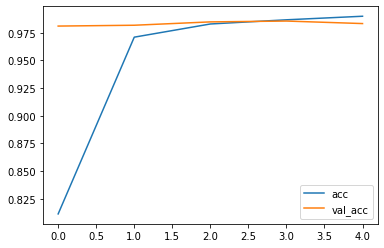

In [17]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
#plt.savefig("Accuracy plot.jpg")

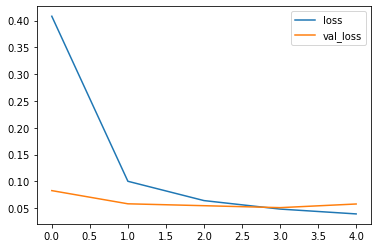

In [18]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
#plt.savefig("Loss plot.jpg")

In [19]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])

In [20]:
test_sentence1 = "I enjoyed my journey on this flight."
predict_sentiment(test_sentence1)

test_sentence2 = "This is the worst flight experience of my life!"
predict_sentiment(test_sentence2)

Predicted label:  Positive
Predicted label:  Negative
